---
# Assignment - Surprise Housing (*Advanced Regression*)
*Author - Jithin Prakash K*
---

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularization in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression. 

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Solution and Approach
---

## Import Libraries

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing        import StandardScaler, PowerTransformer
from sklearn.linear_model         import LinearRegression, Lasso, Ridge
from sklearn.metrics              import r2_score, mean_squared_error
from sklearn.model_selection      import train_test_split, GridSearchCV
from sklearn.feature_selection    import RFE

import warnings
warnings.filterwarnings('ignore')

## Read and Understand Data

In [2]:
df_housing = pd.read_csv('train.csv')

**Head**

In [3]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Shape**

In [4]:
df_housing.shape

(1460, 81)

**Analyzing unique values in id column**

In [5]:
df_housing.Id.nunique()

1460

Since we have all 1460 unique values, dropping the column

In [6]:
df_housing.drop(columns='Id',inplace=True)
df_housing.shape

(1460, 80)

**Info**

In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**Describe**

In [8]:
df_housing.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


**Missing Values**

In [9]:
round((df_housing.isnull().mean()*100)[(df_housing.isnull().mean()*100)>0],2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

**Columns with more than 40% missing values**

In [10]:
drop_columns = (df_housing.isnull().mean()*100)[(df_housing.isnull().mean()*100)>40].index.values
drop_columns

array(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype=object)

**Dropping the columns**

In [11]:
df_housing.drop(columns=drop_columns,inplace=True)
df_housing.shape

(1460, 75)

In [12]:
(df_housing.isnull().mean()*100)[(df_housing.isnull().mean()*100)>0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

### **Analyzing the Numerical data**

In [13]:
df_housing.select_dtypes(['int64','float64']).shape

(1460, 37)

**Selecting int and float datatypes**

In [14]:
df_housing.select_dtypes(['int64','float64']).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


**Describe function to analyze the mean median outliers and distribution by values**

In [15]:
df_housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Missing data for numerical datatypes**

In [16]:
df_num_missing = df_housing.select_dtypes(['int64','float64']).isnull().sum()
df_num_missing[df_num_missing>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

There are only 3 columns with missing values (NaN). We can impute these Null data with median.

**Missing value imputation using Median for numerical data types**

In [17]:
df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].quantile(.5),inplace=True)
df_housing['MasVnrArea'].fillna(df_housing['MasVnrArea'].quantile(.5),inplace=True)
df_housing['GarageYrBlt'].fillna(df_housing['GarageYrBlt'].quantile(.5),inplace=True)

### **Analyzing the Object / Categorical data**

In [18]:
df_housing.select_dtypes('object').shape

(1460, 38)

In [19]:
df_housing.select_dtypes('object').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


**Null values in Object data**

In [20]:
df_obj_missing = df_housing.select_dtypes('object').isnull().sum()
df_obj_missing[df_obj_missing>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

#### **Imputing the missing values**

##### **MasVnrType** *- Masonry veneer type*

In [21]:
df_housing['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [22]:
mode_val = df_housing['MasVnrType'].mode()[0]
mode_val

'None'

In [23]:
df_housing['MasVnrType'].fillna(mode_val,inplace=True)
df_housing['MasVnrType'].value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

##### **Basement Details**
____
BsmtQual *-  Evaluates the height of the basement*  
BsmtCond *- Evaluates the general condition of the basement*  
BsmtExposure *- Refers to walkout or garden level walls*  
BsmtFinType1 *- Rating of basement finished area*  
BsmtFinType2 *- Rating of basement finished area (if multiple types)*

In [24]:
features = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

for feature in features:
    print(df_housing[feature].value_counts(dropna=False),'\n')

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64 

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64 

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 



**Analyzing the NaN values for Basement Columns**

In [25]:
df_housing[features].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [26]:
# Checkin NaN with respect to BsmtQual column to identify null values for all the other columns
df_housing.loc[df_housing.BsmtQual.isnull(),features].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
dtype: int64

It is observed that all the values are NaN for all the columns and this means there is no Basement for these records. The values are changed to NB - Short form for "No Basement"


**Imputing the values to NB (No Basement)**

In [27]:
df_housing.loc[df_housing.BsmtQual.isnull(),features]=df_housing.loc[
    df_housing.BsmtQual.isnull(),features].fillna('NB')

**Checking for the remaining Null values in Basement Columns**

In [28]:
df_housing[features][df_housing[features].isnull().any(1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN
948,Gd,TA,NaN,Unf,Unf


**Imputing BsmtExposure and BsmtFinType2 using Mode**

In [29]:
mode_val = df_housing['BsmtExposure'].mode()[0]
mode_val

'No'

In [30]:
df_housing['BsmtExposure'].fillna(mode_val,inplace=True)

In [31]:
mode_val = df_housing['BsmtFinType2'].mode()[0]
mode_val

'Unf'

In [32]:
df_housing['BsmtFinType2'].fillna(mode_val,inplace=True)

##### **Electrical** *- Electrical system*

In [33]:
df_housing['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [34]:
mode_val = df_housing['Electrical'].mode()[0]
mode_val

'SBrkr'

In [35]:
df_housing['Electrical'].fillna(mode_val,inplace=True)
df_housing['Electrical'].value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

##### **Garage Details**
____
GarageType *- Garage location*  
GarageFinish *- Interior finish of the garage*  
GarageQual *- Garage quality*  
GarageCond *- Garage condition*  

In [36]:
features = ['GarageType','GarageFinish','GarageQual','GarageCond']

for feature in features:
    print(df_housing[feature].value_counts(dropna=False),'\n')

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64 

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64 

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64 



**Analyzing the NaN values for Garage Columns**

In [37]:
df_housing[features].isnull().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [38]:
# Checkin NaN with respect to GarageType column to identify null values for all the other columns
df_housing.loc[df_housing.GarageType.isnull(),features].isnull().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

It is observed that all the values are NaN for all the columns and this means there is no Garage for these records. The values are changed to NG - Short form for "No Garage"


**Imputing the values to NG (No Garage)**

In [39]:
df_housing.loc[df_housing.GarageType.isnull(),features]=df_housing.loc[
    df_housing.GarageType.isnull(),features].fillna('NG')

### **Missing values**

In [40]:
df_housing.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 75, dtype: int64

## Data Visualization

### **Numerical Data**

In [41]:
features = df_housing.select_dtypes(['int64','float64']).columns
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [42]:
len(features)

37

**Box plot of all the numerical values**

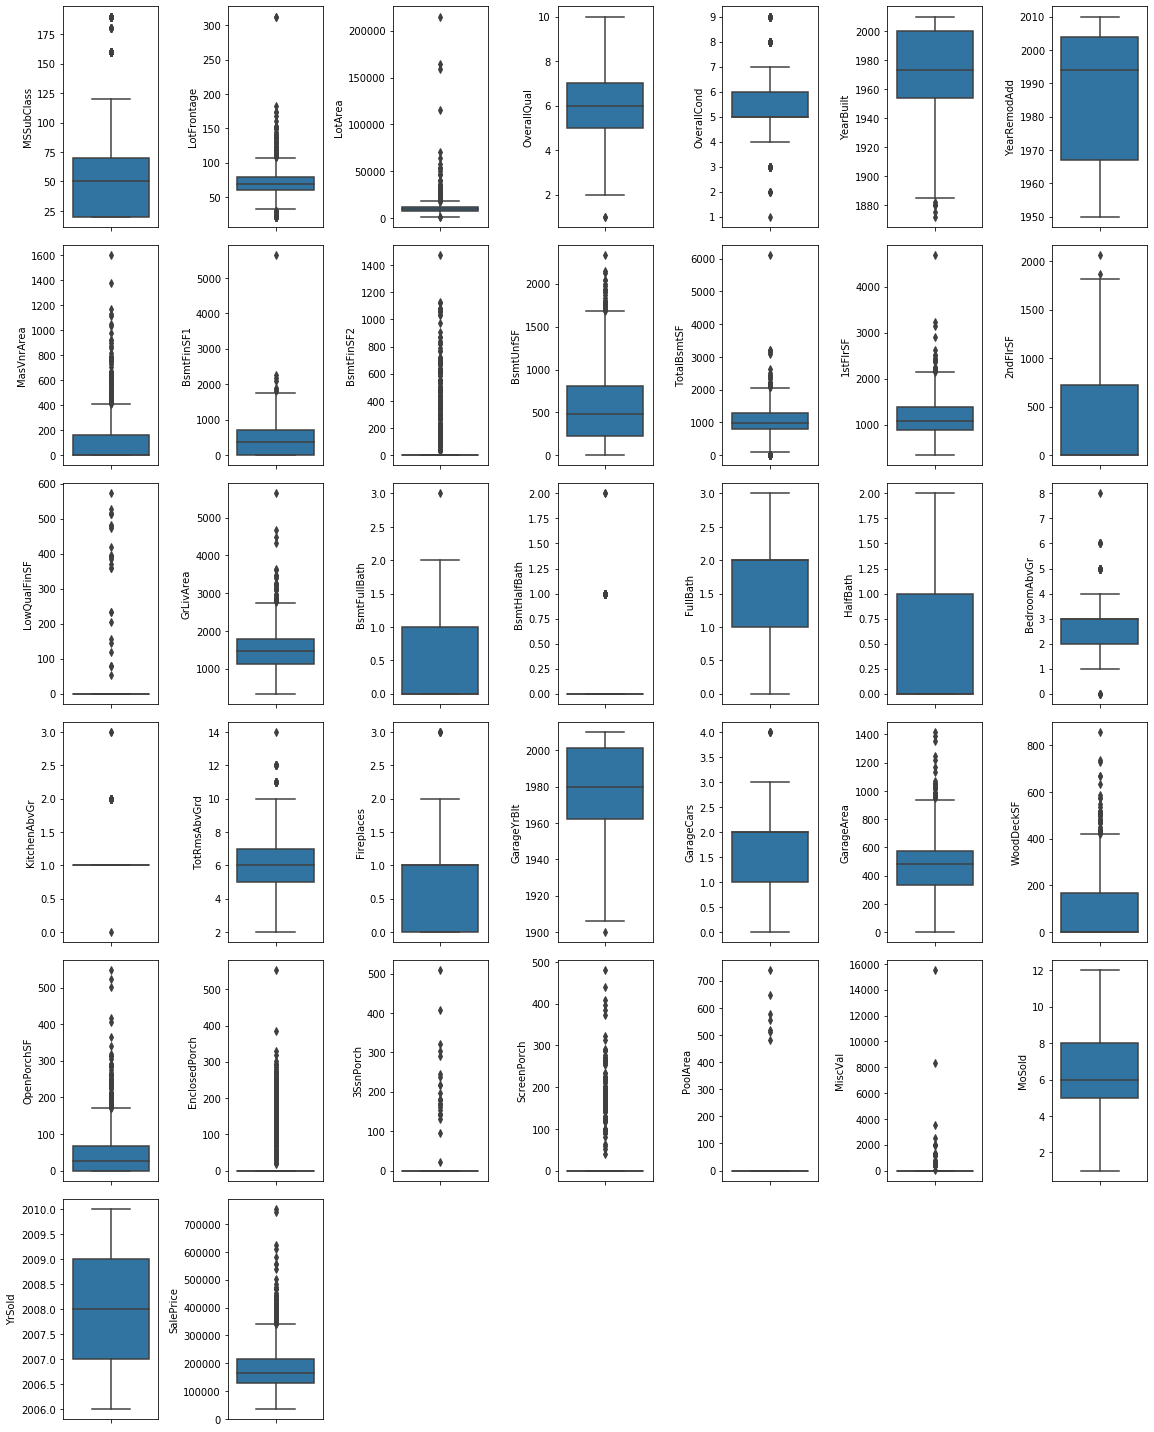

In [43]:
fig,ax = plt.subplots(6,7,figsize=(16,20))
for i,feature in enumerate(features):
    sns.boxplot(y=df_housing[feature],ax=ax.flatten()[i])
for i in range(2,7):
    fig.delaxes(ax[-1][i])
plt.tight_layout()
plt.show()

- It is observed that most of the numerical features have outliers towards the higher side.
- **MSSubClass** : The feature is nominal categorical. We shall convert it to categorical/object datatype.
- **LoftFrontage** : The value lies between 0-200. The median value is around 60. There are outliers at high values.
- **LoftArea** : The value lies between 0-80000. There are outliers at higher values.
- **Overall Quality** : Feature is ordinal categorical in nature. Most of the value is spread between 5-7 with median at 6.
- **Overall Condition** : Feature is ordinal, categorical. The value is distributed between 4-7 where and median is at 5. There are outliers at higher and lower values.
- **YearBuilt** : Most of the properties are built between 1950-2000.
- **YearRemodAdd** : Most properties are built/re-modified during 1965-2005
- **MasVnrArea** : Most values are distributed within 0-400. There are outliers at higher values.
- **MsmtFinSF1** : The distribution is between 0-1800 with outliers at higher end
- **BsmtFinSF2** : Most values are at 0, with less variance
- **TotalBsmtSF** : Values lies within 800-1300 with median at 1000
- **1stFlrSF** : Value is distributed between 0-2100.Median is around 1100 and there are outliers.
- **2ndFlrSF** : Value is distributed between 0-1800.Median is at 0 and there are outliers.
- **OpenporchSF** : Most values lies within 0-180. There are outliers at higher values.
- **EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal** : All these features are with low variance with most values at 0.
- **MoSol** : Maximum  sales have happened during 5th to 8th month. Median is at 6.
- **YrSold** : Most sales happened during 2007-2009. Median is 2008
- **Sales Price** : Sales prices range from 30000-350000. There are outliers.

***Outliers can be handled by using Power Transformation***  
This is being carried out before scaling at a later stage

***Converting MSSubClass to Categorical***

In [44]:
df_housing.MSSubClass=df_housing.MSSubClass.astype('category')
df_housing.MoSold=df_housing.MoSold.astype('category')

#### **Analyzing sales price** - *Target variable*

In [45]:
df_housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

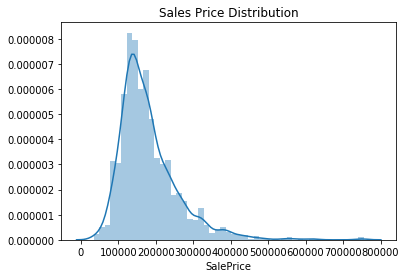

In [46]:
sns.distplot(df_housing.SalePrice)
plt.title('Sales Price Distribution')
plt.show()

- It is observed that the data is right skewed, and we would need to make this normally distributed to apply regression principles.

**Power Transformation**

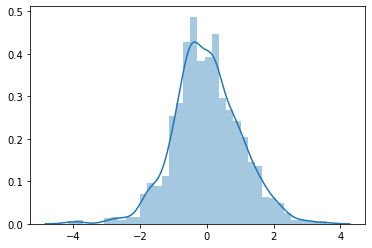

In [47]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer()

sns.distplot(PT.fit_transform(df_housing[['SalePrice']]))
plt.show()

- The power transformation helps out in converting sales price data normally distributed.

**Log Transformation**

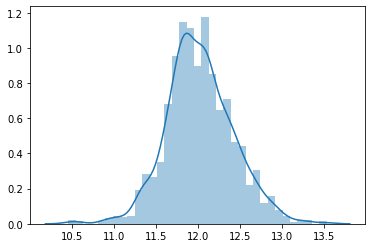

In [48]:
sns.distplot(np.log(df_housing[['SalePrice']]))
plt.show()

- The Log transformation also helps out in converting sales price data normally distributed.

- We can choose Log or Power transformation, In this case, selecting power transformation as we can apply it to train and test data.

#### **Analyzing Basement half bathrooms**

In [49]:
df_housing.BsmtHalfBath.value_counts(normalize=True).head().round(4)*100

0    94.38
1     5.48
2     0.14
Name: BsmtHalfBath, dtype: float64

- It is observed that more than 94% data belongs to one category and there is low variance. This feature can be dropped as it has low variance 

In [50]:
drop_columns = ['BsmtHalfBath']

#### **Analyzing Kitchens above grade**

In [51]:
df_housing.KitchenAbvGr.value_counts(normalize=True).head().round(4)*100

1    95.34
2     4.45
3     0.14
0     0.07
Name: KitchenAbvGr, dtype: float64

- It is observed that more than 95% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [52]:
drop_columns.append('KitchenAbvGr')

#### **Analyzing Pool Area**

In [53]:
df_housing.PoolArea.value_counts(normalize=True).head().round(4)*100

0      99.52
738     0.07
648     0.07
576     0.07
555     0.07
Name: PoolArea, dtype: float64

- It is observed that more than 99% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [54]:
drop_columns.append('PoolArea')

#### **Analyzing Type 2 finished square feet**

In [55]:
df_housing.BsmtFinSF2.value_counts(normalize=True).head().round(4)*100

0      88.56
180     0.34
374     0.21
551     0.14
93      0.14
Name: BsmtFinSF2, dtype: float64

- It is observed that more than 88% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [56]:
drop_columns.append('BsmtFinSF2')

#### **Analyzing Low quality finished square feet (all floors)**

In [57]:
df_housing.LowQualFinSF.value_counts(normalize=True).head().round(4)*100

0      98.22
80      0.21
360     0.14
528     0.07
53      0.07
Name: LowQualFinSF, dtype: float64

- It is observed that more than 98% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [58]:
drop_columns.append('LowQualFinSF')

#### **Analyzing Enclosed porch area**

In [59]:
df_housing.EnclosedPorch.value_counts(normalize=True).head().round(4)*100

0      85.75
112     1.03
96      0.41
120     0.34
144     0.34
Name: EnclosedPorch, dtype: float64

- It is observed that more than 85% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [60]:
drop_columns.append('EnclosedPorch')

#### **Analyzing Three season porch area**

In [61]:
df_housing['3SsnPorch'].value_counts(normalize=True).head().round(4)*100

0      98.36
168     0.21
216     0.14
144     0.14
180     0.14
Name: 3SsnPorch, dtype: float64

- It is observed that more than 98% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [62]:
drop_columns.append('3SsnPorch')

#### **Analyzing Screen porch area**

In [63]:
df_housing.ScreenPorch.value_counts(normalize=True).head().round(4)*100

0      92.05
192     0.41
224     0.34
120     0.34
189     0.27
Name: ScreenPorch, dtype: float64

- It is observed that more than 92% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [64]:
drop_columns.append('ScreenPorch')

#### **Analyzing Value of miscellaneous feature**

In [65]:
df_housing.MiscVal.value_counts(normalize=True).head().round(4)*100

0      96.44
400     0.75
500     0.55
700     0.34
450     0.27
Name: MiscVal, dtype: float64

- It is observed that more than 96% data belongs to one category and there is low variance. This feature also can be dropped as it has low variance 

In [66]:
drop_columns.append('MiscVal')

#### **Converting Year Columns**

**YearBuilt**

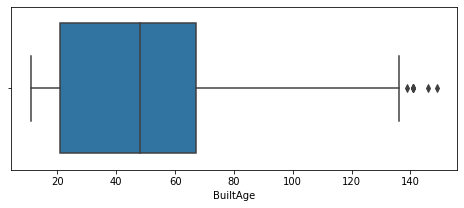

In [67]:
#Creating a New columns called BuiltAge
df_housing['BuiltAge'] = 2021-df_housing.YearBuilt
drop_columns.append('YearBuilt')
plt.figure(figsize=(8,3))
sns.boxplot(df_housing.BuiltAge)
plt.show()

**YearRemodAdd**

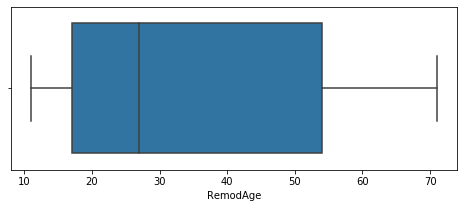

In [68]:
#Creating a New columns called RemodAge
df_housing['RemodAge'] = 2021-df_housing.YearRemodAdd
drop_columns.append('YearRemodAdd')
plt.figure(figsize=(8,3))
sns.boxplot(df_housing.RemodAge)
plt.show()

**GarageYrBlt**

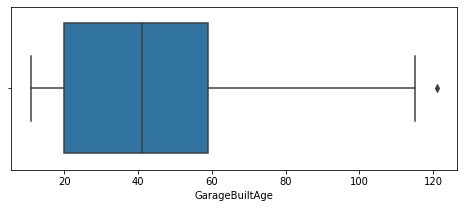

In [69]:
#Creating a New columns called GarageBuiltAge
df_housing['GarageBuiltAge'] = 2021-df_housing.GarageYrBlt
drop_columns.append('GarageYrBlt')
plt.figure(figsize=(8,3))
sns.boxplot(df_housing.GarageBuiltAge)
plt.show()

**YrSold**

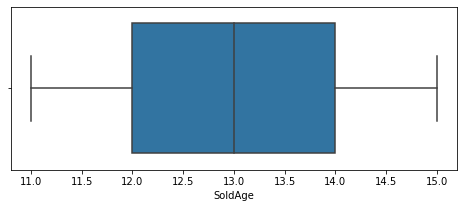

In [70]:
#Creating a New columns called SoldAge
df_housing['SoldAge'] = 2021-df_housing.YrSold
drop_columns.append('YrSold')
plt.figure(figsize=(8,3))
sns.boxplot(df_housing.SoldAge)
plt.show()

**Dropping the columns with low variance**

In [71]:
df_housing.drop(columns=drop_columns,inplace=True)
df_housing.shape

(1460, 66)

#### **Box plot of all the numerical values**

In [72]:
features = df_housing.select_dtypes(['int64','float64']).columns
len(features)

26

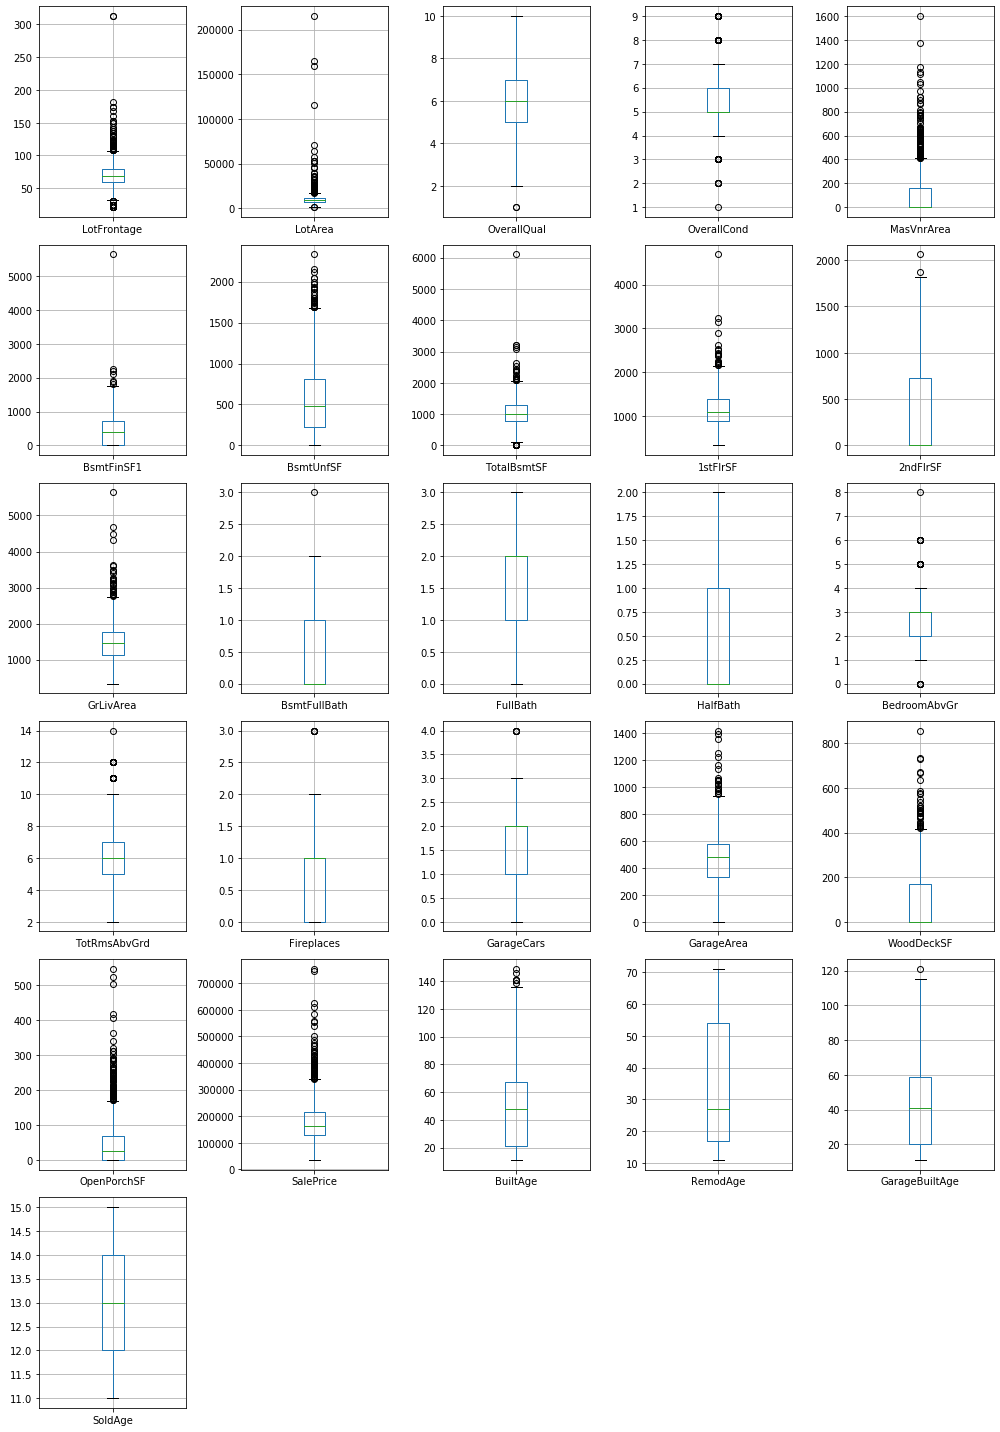

In [73]:
fig,ax = plt.subplots(6,5,figsize=(14,20))
for i,feature in enumerate(features):
    df_housing[[feature]].boxplot(ax=ax.flatten()[i])
for i in range(0,4):
    fig.delaxes(ax[-1][-1-i])
plt.tight_layout()
plt.show()

- Distribution is clearly visible for all the plots though there are  outliers for some features.

### **Categorical Data**

In [74]:
features = df_housing.select_dtypes(['object','category']).columns
features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

**Unique categories in columns**

In [75]:
# Sorting the unique categories
df_housing.select_dtypes('object').nunique().sort_values()

Street            2
CentralAir        2
Utilities         2
PavedDrive        3
LandSlope         3
KitchenQual       4
ExterQual         4
MasVnrType        4
LandContour       4
LotShape          4
GarageFinish      4
Electrical        5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
GarageCond        6
GarageQual        6
Heating           6
SaleCondition     6
RoofStyle         6
Foundation        6
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
HouseStyle        8
Condition2        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

#### **Observing binary categorical data**

**Street**

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64 




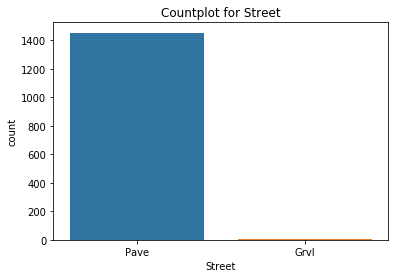

In [76]:
def valcount_plot(feature):
    print(df_housing[feature].value_counts(normalize=True).round(4).head()*100,'\n'*2)
    sns.countplot(df_housing[feature])
    plt.title('Countplot for '+feature)
    plt.show()

valcount_plot('Street')

- There is low variance. 99% of data has one category and hence this feature can be dropped.

In [77]:
drop_columns=['Street']

**CentralAir**

Y    93.49
N     6.51
Name: CentralAir, dtype: float64 




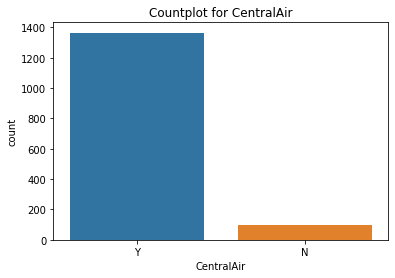

In [78]:
valcount_plot('CentralAir')

- There is low variance. 93% of data has one category and hence this feature can be dropped.

In [79]:
drop_columns.append('CentralAir')

**Utilities**

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64 




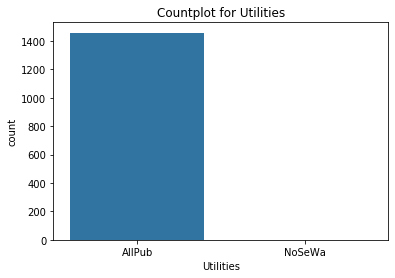

In [80]:
valcount_plot('Utilities')

- There is low variance. 99% of data has one category and hence this feature can be dropped.

In [81]:
drop_columns.append('Utilities')

#### **Other categorical columns**

**Obtaining features with number of categories 3-5**

In [82]:
features = df_housing.select_dtypes('object').nunique().sort_values()[
                (df_housing.select_dtypes('object').nunique()>2) & 
                (df_housing.select_dtypes('object').nunique()<6)].index.values
features

array(['PavedDrive', 'LandSlope', 'KitchenQual', 'ExterQual',
       'MasVnrType', 'LandContour', 'LotShape', 'GarageFinish',
       'Electrical', 'HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'MSZoning', 'ExterCond', 'BldgType', 'LotConfig'], dtype=object)

In [83]:
len(features)

17

**Countplot for the features with 3-5 unique categories**

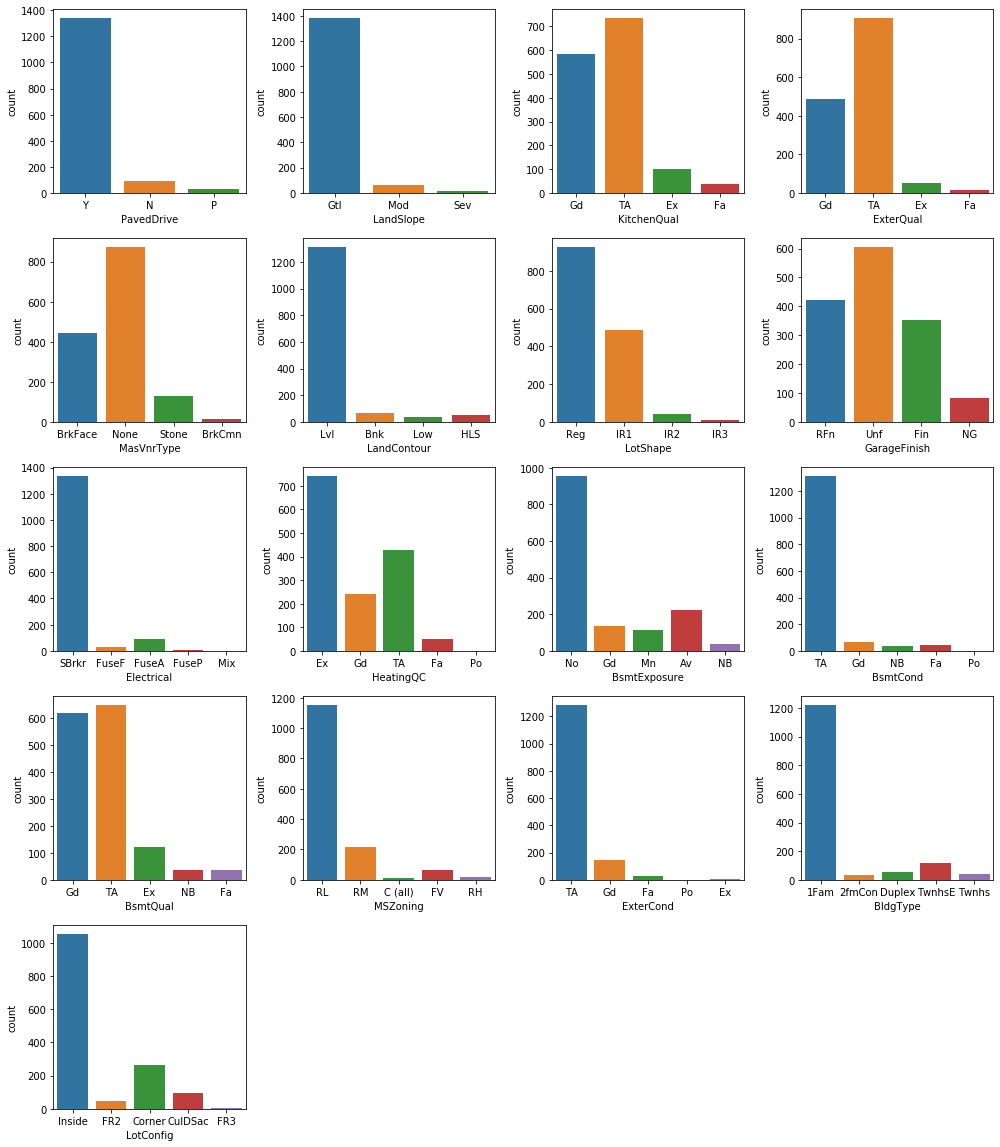

In [84]:
fig,ax = plt.subplots(5,4,figsize=(14,16))
for i,feature in enumerate(features):
    sns.countplot(df_housing[feature],ax=ax.flatten()[i])

for i in range(0,3):
    fig.delaxes(ax[-1][-1-i])
plt.tight_layout()
plt.show()

Most houses are 
 - With PavedDrive
 - With Gentle slope
 - Kitchen Quality Typical or Average. 
 - ExterQuality Typical or Average. 
 - MasVnrType None
 - Near flat or level land contour
 - Regular lotshape
 - Unifinshed Garage
 - Elecrical Standard Circuit Breakers & Romex
 - Excellent Heating quality and condition
 - No Basement Exposure
 - Typical/Average basement condition and quality
 - Residential Low Density zone.
 - Typical/Average exterior condition
 - Single-family Detached building type
 - Inside Lot configuration

**PavedDrive**

In [85]:
print(df_housing['PavedDrive'].value_counts(normalize=True).round(4).head()*100)

Y    91.78
N     6.16
P     2.05
Name: PavedDrive, dtype: float64


- Low variance feature. It can be dropped. Y values are high at 91% compared to other categories.

In [86]:
drop_columns.append('PavedDrive')

**LandSlope**

In [87]:
print(df_housing['LandSlope'].value_counts(normalize=True).round(4).head()*100)

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64


- Low variance feature. It can be dropped. 'Gtl' values are high at 94% compared to other categories.

In [88]:
drop_columns.append('LandSlope')

**Electrical**

In [89]:
print(df_housing['Electrical'].value_counts(normalize=True).round(4).head()*100)

SBrkr    91.44
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07
Name: Electrical, dtype: float64


- Low variance feature. It can be dropped. ```'SBrkr'``` values are high at 91% compared to other categories.

In [90]:
drop_columns.append('Electrical')

**LandContour**

In [91]:
print(df_housing['LandContour'].value_counts(normalize=True).round(4).head()*100)

Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64


- Low variance feature. It can be dropped. ```'Lvl'``` values are high at 89% compared to other categories.

In [92]:
drop_columns.append('LandContour')

**BsmtCond**

In [93]:
print(df_housing['BsmtCond'].value_counts(normalize=True).round(4).head()*100)

TA    89.79
Gd     4.45
Fa     3.08
NB     2.53
Po     0.14
Name: BsmtCond, dtype: float64


- Low variance feature. It can be dropped. ```'TA'``` values are high at 89% compared to other categories.

In [94]:
drop_columns.append('BsmtCond')

**BldgType**

In [95]:
print(df_housing['BldgType'].value_counts(normalize=True).round(4).head()*100)

1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: BldgType, dtype: float64


- Low variance feature. It can be dropped. ```'1Fam'``` values are high at 83% compared to other categories.

In [96]:
drop_columns.append('BldgType')

**Obtaining features with number of categories greater than 5**

In [97]:
features = df_housing.select_dtypes(['object','category']).nunique().sort_values()[
                (df_housing.select_dtypes(['object','category']).nunique()>5)].index.values
features

array(['GarageQual', 'GarageCond', 'Heating', 'SaleCondition',
       'RoofStyle', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'Functional', 'GarageType', 'RoofMatl', 'HouseStyle', 'Condition2',
       'SaleType', 'Condition1', 'MoSold', 'Exterior1st', 'MSSubClass',
       'Exterior2nd', 'Neighborhood'], dtype=object)

In [98]:
len(features)

20

**Countplot for the features with more than 5 unique categories**

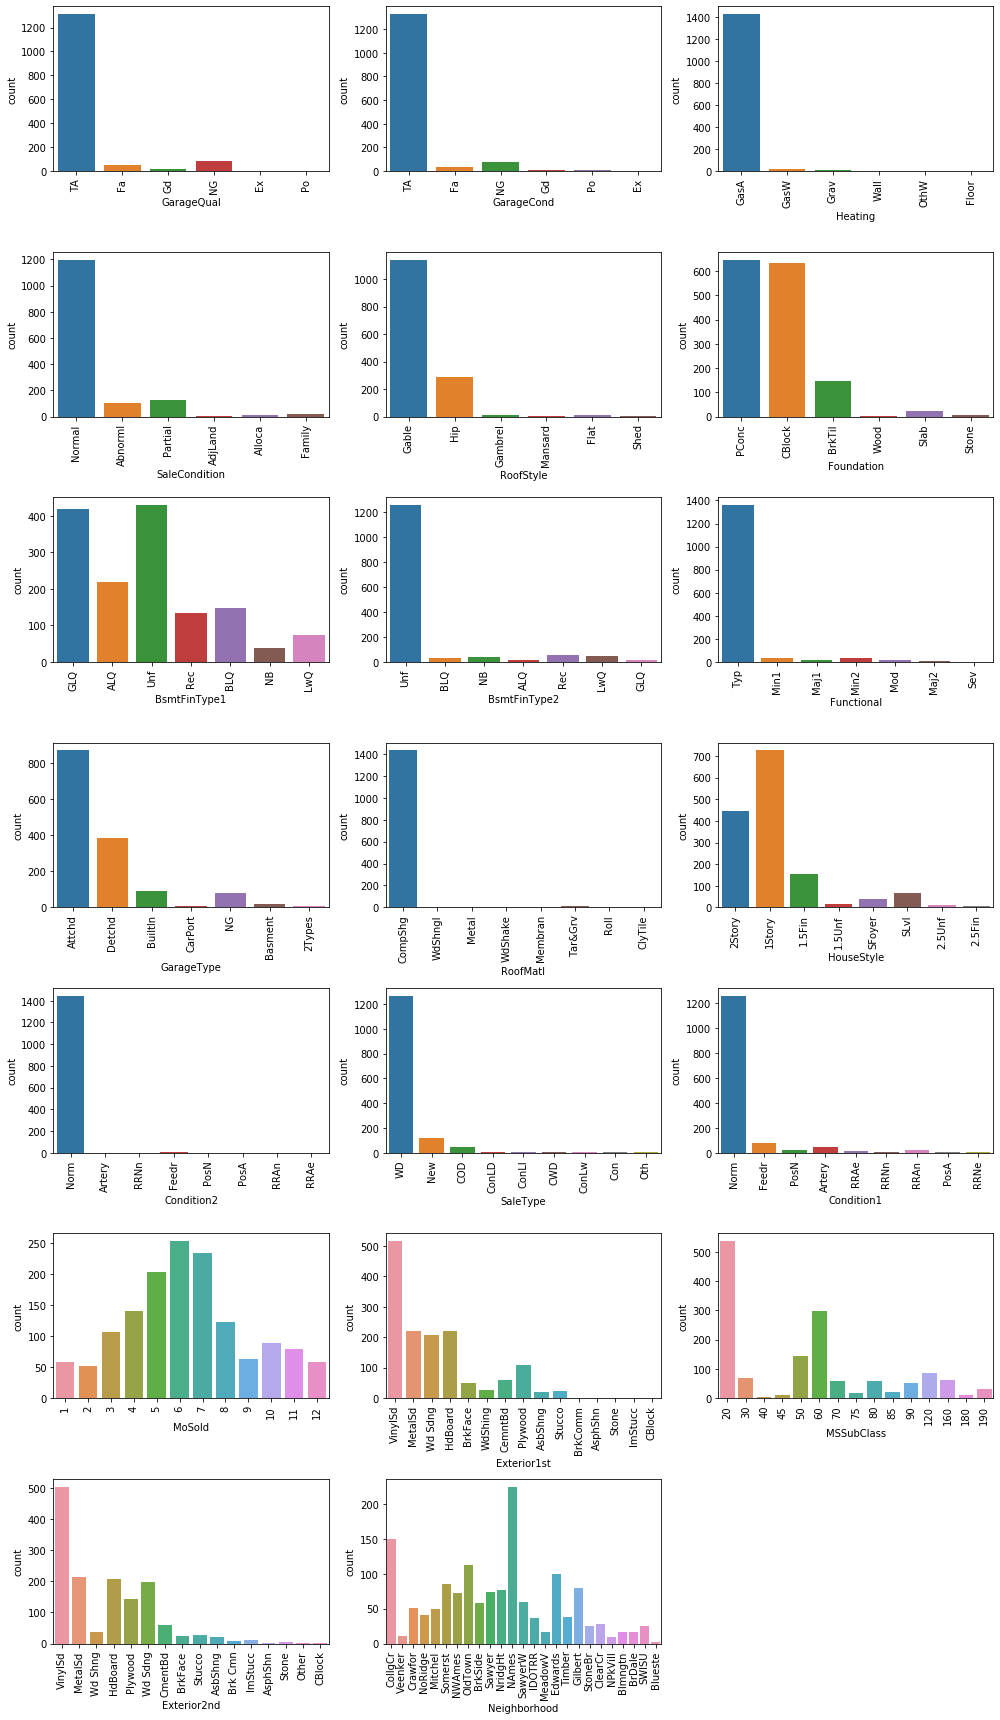

In [99]:
fig,ax = plt.subplots(7,3,figsize=(14,24))
for i,feature in enumerate(features):
    ax1 = sns.countplot(df_housing[feature],ax=ax.flatten()[i])
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
fig.delaxes(ax[-1][-1])
plt.tight_layout()
plt.show()

Most houses are 
 - Typical/Average Garage Condition and Quality
 - Gas forced warm air furnace heating
 - Normal Sale condition
 - Gable roof style
 - Foundation is either Cinder Block or Poured Concrete
 - Unfinished basement type
 - Typical home Functionality 
 - Attached Garage
 - Good Living Quarters or Unfinished basement type 1
 - One story dwelling
 - Proximity to various conditions - Normal
 - Roof material Standard (Composite) Shingle
 - Warranty Deed - Conventional Sale type
 - Vinyl Siding Exterior covering on house
 - MSSubclass - 1-Story 1946 & Newer all styles
 - North Ames Neighbors

**GarageQual**

In [100]:
print(df_housing['GarageQual'].value_counts(normalize=True).round(4).head()*100)

TA    89.79
NG     5.55
Fa     3.29
Gd     0.96
Ex     0.21
Name: GarageQual, dtype: float64


- Low variance feature. It can be dropped. ```'TA'``` values are high at 89% compared to other categories.

In [101]:
drop_columns.append('GarageQual')

**GarageCond**

In [102]:
print(df_housing['GarageCond'].value_counts(normalize=True).round(4).head()*100)

TA    90.82
NG     5.55
Fa     2.40
Gd     0.62
Po     0.48
Name: GarageCond, dtype: float64


- Low variance feature. It can be dropped. ```'TA'``` values are high at 90% compared to other categories.

In [103]:
drop_columns.append('GarageCond')

**Heating**

In [104]:
print(df_housing['Heating'].value_counts(normalize=True).round(4).head()*100)

GasA    97.81
GasW     1.23
Grav     0.48
Wall     0.27
OthW     0.14
Name: Heating, dtype: float64


- Low variance feature. It can be dropped. ```'GasA'``` values are high at 97% compared to other categories.

In [105]:
drop_columns.append('Heating')

**SaleCondition**

In [106]:
print(df_housing['SaleCondition'].value_counts(normalize=True).round(4).head()*100)

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
Name: SaleCondition, dtype: float64


- Low variance feature. It can be dropped. ```'Normal'``` values are high at 82% compared to other categories.

In [107]:
drop_columns.append('SaleCondition')

**BsmtFinType2**

In [108]:
print(df_housing['BsmtFinType2'].value_counts(normalize=True).round(4).head()*100)

Unf    86.10
Rec     3.70
LwQ     3.15
NB      2.53
BLQ     2.26
Name: BsmtFinType2, dtype: float64


- Low variance feature. It can be dropped. ```'Unfinished'``` values are high at 86% compared to other categories.

In [109]:
drop_columns.append('BsmtFinType2')

**Functional**

In [110]:
print(df_housing['Functional'].value_counts(normalize=True).round(4).head()*100)

Typ     93.15
Min2     2.33
Min1     2.12
Mod      1.03
Maj1     0.96
Name: Functional, dtype: float64


- Low variance feature. It can be dropped. ```'Typ'``` values are high at 93% compared to other categories.

In [111]:
drop_columns.append('Functional')

**RoofMatl**

In [112]:
print(df_housing['RoofMatl'].value_counts(normalize=True).round(4).head()*100)

CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Metal       0.07
Name: RoofMatl, dtype: float64


- Low variance feature. It can be dropped. ```'CompShg'``` values are high at 98% compared to other categories.

In [113]:
drop_columns.append('RoofMatl')

**Condition1**

In [114]:
print(df_housing['Condition1'].value_counts(normalize=True).round(4).head()*100)

Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
Name: Condition1, dtype: float64


- Low variance feature. It can be dropped. ```'Norm'``` values are high at 86% compared to other categories.

In [115]:
drop_columns.append('Condition1')

**Condition2**

In [116]:
print(df_housing['Condition2'].value_counts(normalize=True).round(4).head()*100)

Norm      98.97
Feedr      0.41
RRNn       0.14
PosN       0.14
Artery     0.14
Name: Condition2, dtype: float64


- Low variance feature. It can be dropped. ```'Norm'``` values are high at 98% compared to other categories.

In [117]:
drop_columns.append('Condition2')

**SaleType**

In [118]:
print(df_housing['SaleType'].value_counts(normalize=True).round(4).head()*100)

WD       86.78
New       8.36
COD       2.95
ConLD     0.62
ConLw     0.34
Name: SaleType, dtype: float64


- Low variance feature. It can be dropped. ```'WD'``` values are high at 86% compared to other categories.

In [119]:
drop_columns.append('SaleType')

#### **Dropping Columns that has low variance**

In [120]:
df_housing.drop(columns=drop_columns,inplace=True)
df_housing.shape

(1460, 47)

#### **Combining features as *Others***

**Function to combine the categories to others using percentage and value_counts**

In [121]:
def group_Others(feature,perc):
    perc=perc/100
    others = df_housing[feature].value_counts(normalize=True)[df_housing[feature].value_counts(normalize=True)<perc].index
    df_housing[feature]=df_housing[feature].apply(lambda x: 'Others_'+feature if x in others else x)
    print(df_housing[feature].value_counts(normalize=True).round(4)*100)

**HouseStyle**

In [122]:
df_housing['HouseStyle'].value_counts(normalize=True).round(4)*100

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

***Combining categories <5%***

In [123]:
group_Others('HouseStyle',5)

1Story               49.73
2Story               30.48
1.5Fin               10.55
Others_HouseStyle     9.25
Name: HouseStyle, dtype: float64


**MSSubClass**

In [124]:
df_housing['MSSubClass'].value_counts(normalize=True).round(4)*100

20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64

***Combining categories <3%***

In [125]:
group_Others('MSSubClass',3)

20                   36.71
60                   20.48
50                    9.86
Others_MSSubClass     6.30
120                   5.96
30                    4.73
160                   4.32
70                    4.11
80                    3.97
90                    3.56
Name: MSSubClass, dtype: float64


**Exterior1st**

In [126]:
df_housing['Exterior1st'].value_counts(normalize=True).round(4)*100

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
BrkComm     0.14
Stone       0.14
ImStucc     0.07
AsphShn     0.07
CBlock      0.07
Name: Exterior1st, dtype: float64

***Combining categories <3%***

In [127]:
group_Others('Exterior1st',3)

VinylSd               35.27
HdBoard               15.21
MetalSd               15.07
Wd Sdng               14.11
Plywood                7.40
Others_Exterior1st     5.34
CemntBd                4.18
BrkFace                3.42
Name: Exterior1st, dtype: float64


**Exterior2nd**

In [128]:
df_housing['Exterior2nd'].value_counts(normalize=True).round(4)*100

VinylSd    34.52
MetalSd    14.66
HdBoard    14.18
Wd Sdng    13.49
Plywood     9.73
CmentBd     4.11
Wd Shng     2.60
Stucco      1.78
BrkFace     1.71
AsbShng     1.37
ImStucc     0.68
Brk Cmn     0.48
Stone       0.34
AsphShn     0.21
CBlock      0.07
Other       0.07
Name: Exterior2nd, dtype: float64

***Combining categories <3%***

In [129]:
group_Others('Exterior2nd',3)

VinylSd               34.52
MetalSd               14.66
HdBoard               14.18
Wd Sdng               13.49
Plywood                9.73
Others_Exterior2nd     9.32
CmentBd                4.11
Name: Exterior2nd, dtype: float64


**Neighborhood**

In [130]:
df_housing['Neighborhood'].value_counts(normalize=True).round(4)*100

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
StoneBr     1.71
SWISU       1.71
Blmngtn     1.16
MeadowV     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64

***Combining categories <4%***

In [131]:
group_Others('Neighborhood',4)

Others_Neighborhood    29.04
NAmes                  15.41
CollgCr                10.27
OldTown                 7.74
Edwards                 6.85
Somerst                 5.89
Gilbert                 5.41
NridgHt                 5.27
Sawyer                  5.07
NWAmes                  5.00
SawyerW                 4.04
Name: Neighborhood, dtype: float64


### **Bivariate Analysis**

**Correlation**

In [132]:
df_housing.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,BuiltAge,RemodAge,GarageBuiltAge,SoldAge
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.178469,0.214367,0.124098,0.363472,0.413773,0.072388,...,0.233221,0.269539,0.323511,0.075542,0.137014,0.334771,-0.116685,-0.083348,-0.062996,-0.006380
LotArea,0.304522,1.000000,0.105806,-0.005636,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,...,0.271364,0.154871,0.180403,0.171698,0.084774,0.263843,-0.014228,-0.013788,0.025865,0.014261
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.407252,0.239666,0.308159,0.537808,0.476224,0.295493,...,0.396765,0.600671,0.562022,0.238923,0.308819,0.790982,-0.572323,-0.550684,-0.514231,0.027347
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,-0.136841,-0.171098,-0.144203,0.028942,...,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,-0.077856,0.375983,-0.073741,0.306276,-0.043950
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,...,0.247015,0.361945,0.370884,0.159991,0.122528,0.472614,-0.311600,-0.176529,-0.244444,0.008317
BsmtFinSF1,0.214367,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,...,0.260011,0.224054,0.296970,0.204306,0.111761,0.386420,-0.249503,-0.128451,-0.148782,-0.014359
BsmtUnfSF,0.124098,-0.002618,0.308159,-0.136841,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,...,0.051575,0.214175,0.183303,-0.005316,0.129005,0.214479,-0.149040,-0.181133,-0.185610,0.041258
TotalBsmtSF,0.363472,0.260833,0.537808,-0.171098,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,...,0.339519,0.434585,0.486665,0.232019,0.247264,0.613581,-0.391452,-0.291066,-0.309386,0.014969
1stFlrSF,0.413773,0.299475,0.476224,-0.144203,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,...,0.410531,0.439317,0.489782,0.235459,0.211671,0.605852,-0.281986,-0.240379,-0.224897,0.013604
2ndFlrSF,0.072388,0.050986,0.295493,0.028942,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,...,0.194561,0.183926,0.138347,0.092165,0.208026,0.319334,-0.010308,-0.140024,-0.068441,0.028700


**Heatmap of Correlation**

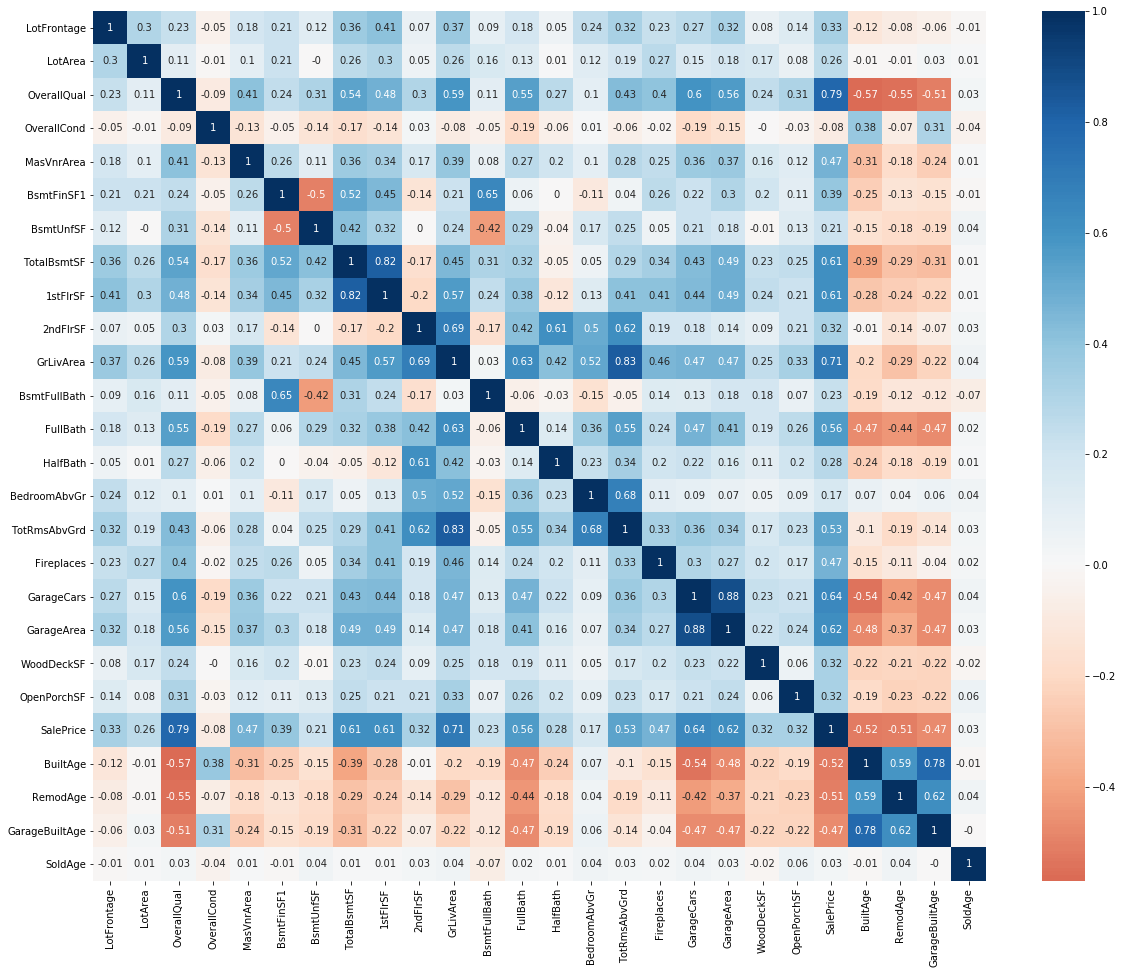

In [133]:
plt.figure(figsize=(20,16))
sns.heatmap(df_housing.corr().round(2),annot=True,fmt='g',cmap='RdBu',center=0)
plt.show()

**Pairplot for sale price. Built Age, Living Area, Total Basement SF, Tot RMS Above Grade**

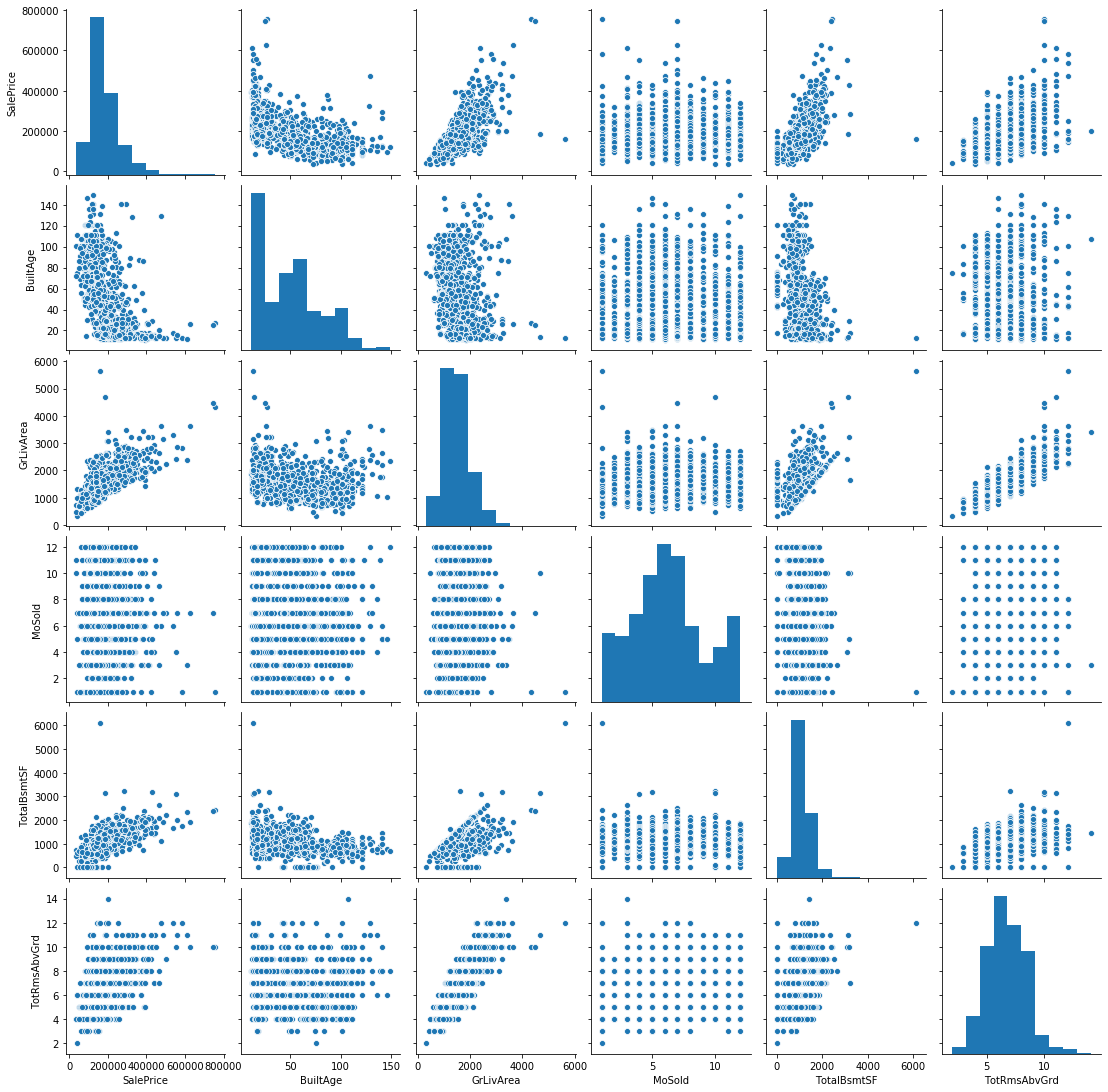

In [134]:
sns.pairplot(df_housing[['SalePrice','BuiltAge','GrLivArea','MoSold','TotalBsmtSF', 'TotRmsAbvGrd']])
plt.show()

- Sale Price and Total Bsment SF shows high positive correlation
- Sale Price and Gr Living Area shows high positive correlation
- Sale Price and Built Age shows slight negative correlation
- Gr Living Area and Total Bsment SF shows slight positive correlation
- Month Sold doesnt show any particular trend to the sale price
- TotRMSAbvGrd and Sale price shows positive correlation
- TotRMSAbvGrd and Gr Living Area shows very high positive correlation

**Categorical Columns**

In [135]:
df_housing.select_dtypes(['object','category']).columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish', 'MoSold'],
      dtype='object')

**Box plot for different features with respect to Sale Price - Bi-Variate (Categorical - Numeric)**

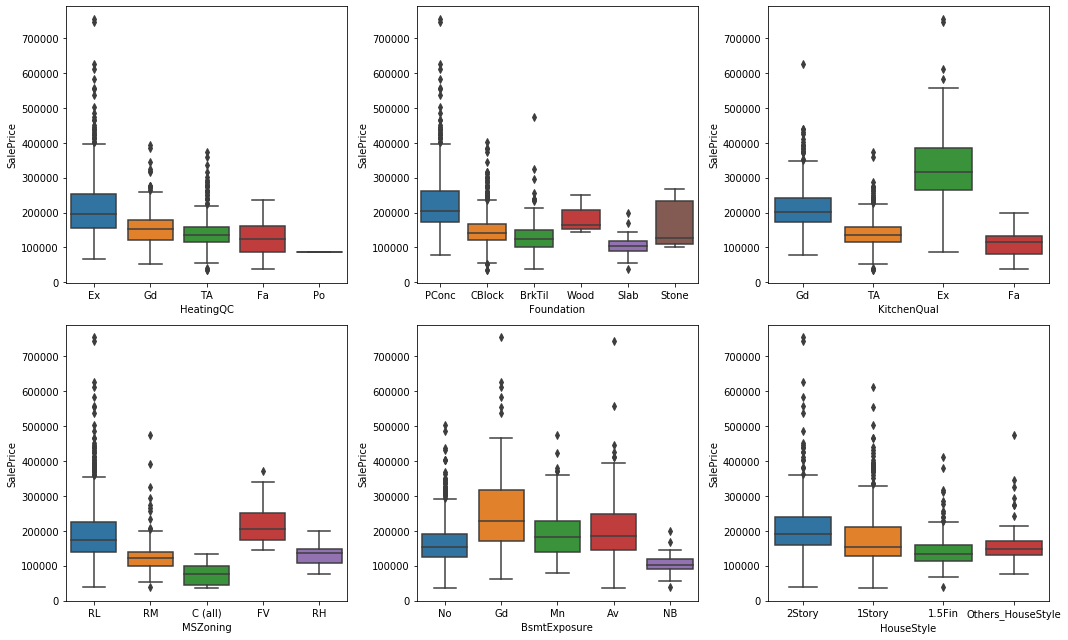

In [136]:
features = ['HeatingQC','Foundation', 'KitchenQual', 'MSZoning', 'BsmtExposure', 'HouseStyle']
fig,ax=plt.subplots(2,3,figsize=(15,9))
for i,feature in enumerate(features):
    sns.boxplot(x=feature,y='SalePrice',data=df_housing,ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

Sales prices are high for
- Excellent Heating Quality
- Poured Contcete foundation
- Excellent Kitchen Quality
- Floating Village Residential zone
- Good Basement exposure
- 2 Story house style

## Data Preparation

#### Mapping the Ordinal Features

In [137]:
df_housing.LotShape=df_housing.LotShape.map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df_housing.ExterQual=df_housing.ExterQual.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_housing.ExterCond=df_housing.ExterCond.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_housing.BsmtQual=df_housing.BsmtQual.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NB':0})
df_housing.BsmtExposure=df_housing.BsmtExposure.map({'Gd':4,'Av':3,'Mn':2,'No':1,'NB':0})
df_housing.BsmtFinType1 = df_housing.BsmtFinType1.map({'NB':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_housing.HeatingQC = df_housing.HeatingQC.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_housing.KitchenQual= df_housing.KitchenQual.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_housing.GarageFinish= df_housing.GarageFinish.map({'Fin':3,'RFn':2,'Unf':1,'NG':0})

#### **Converting the categorical features to dummies (one hot encoding with drop first)**

**Function to create dummy dataframe**   
```It removes the column with 'Other' or the last column```

In [138]:
def create_dummy(feature):
    df_dummy = pd.get_dummies(df_housing[feature],prefix=feature)
    for cat_name in df_dummy.columns:  
        if 'Other' in cat_name: break;
    df_dummy.drop(columns = cat_name,inplace=True)
    return df_dummy

**Object and Category features**

In [139]:
features = df_housing.select_dtypes(['object','category']).columns
features 

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'MoSold'],
      dtype='object')

**One-hot encoding all categorical columns using create_dummy function**

In [140]:
for feature in features:
    df_housing = pd.concat([df_housing, create_dummy(feature)],axis=1)

df_housing.drop(columns = features,inplace=True)

**Shape of the new dataframe**

In [141]:
df_housing.shape

(1460, 108)

**First five records of the new dataframe**

In [142]:
df_housing.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,...,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11
0,65.0,8450,3,7,5,196.0,3,2,4,1,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,3,6,8,0.0,2,2,4,4,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,2,7,5,162.0,3,2,4,2,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,2,7,5,0.0,2,2,3,1,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,2,8,5,350.0,3,2,4,3,...,0,0,0,0,0,0,0,0,0,0


## Train-Test  split

In [143]:
y = df_housing[['SalePrice']]
X = df_housing.drop(columns='SalePrice')

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [145]:
print('Shape of X_train\t', X_train.shape)
print('Shape of y_train\t', y_train.shape,'\n')

print('Shape of X_test\t\t', X_test.shape)
print('Shape of y_test\t\t', y_test.shape)

Shape of X_train	 (1021, 107)
Shape of y_train	 (1021, 1) 

Shape of X_test		 (438, 107)
Shape of y_test		 (438, 1)


## Scaling and Transforming

**Power Transforming the Train data**

In [146]:
pt_X = PowerTransformer()
X_train = pd.DataFrame(pt_X.fit_transform(X_train),columns=X_train.columns)

In [147]:
pt_y = PowerTransformer()
y_train = pt_y.fit_transform(y_train)

**Scaling the Train data using StandardScaler**

In [148]:
scale_X = StandardScaler()
X_train = pd.DataFrame(scale_X.fit_transform(X_train),columns=X_train.columns)

scale_y = StandardScaler()
y_train = pd.Series(scale_y.fit_transform(y_train).reshape(-1),name='SalePrice')

**Transforming Test data**

In [149]:
X_test = pd.DataFrame(pt_X.transform(X_test),columns=X_test.columns)
X_test = pd.DataFrame(scale_X.transform(X_test),columns=X_test.columns)

In [150]:
y_test = pt_y.transform(y_test.values.reshape(-1,1))
y_test = pd.Series(scale_y.transform(y_test).reshape(-1),name='SalePrice')

**Plotting y_train and y_test distribution**

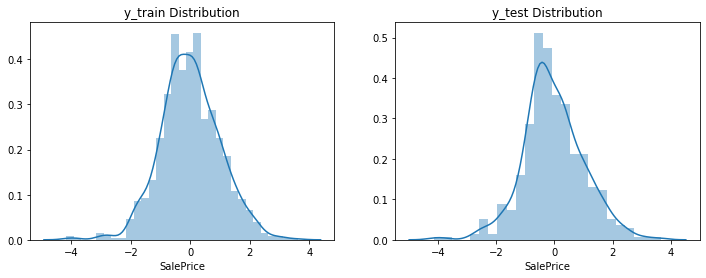

In [151]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_train)
plt.title('y_train Distribution')

plt.subplot(122)
sns.distplot(y_test)
plt.title('y_test Distribution')
plt.show()

## Model Building and Evaluation

In [152]:
'Total Number of Columns ='+str(len(X_train.columns))

'Total Number of Columns =107'

### RFE

In [153]:
lm = LinearRegression()

**Using 60 as number of features**

In [154]:
rfe = RFE(lm,55)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=55, step=1, verbose=0)

In [155]:
df_RFE = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),
                      columns = ['Features','Support','Rank'])
df_RFE.sort_values(by='Rank')

,Features,Support,Rank
0,LotFrontage,True,1
38,MSSubClass_70,True,1
42,MSSubClass_160,True,1
43,MSZoning_C (all),True,1
44,MSZoning_FV,True,1
...,...,...,...
12,BsmtUnfSF,False,49
29,OpenPorchSF,False,50
6,ExterQual,False,51
80,Exterior2nd_VinylSd,False,52


In [156]:
features = df_RFE[df_RFE.Support==True].Features.values
len(features)

55

**First 5 RFE features**

In [157]:
features[:5]

array(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual'],
      dtype=object)

**Filtering train and test data for RFE features**

In [158]:
X_train = X_train[features]
X_test = X_test[features]

### Linear Regression

In [159]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print the coefficients and intercept**

In [160]:
print(lm.intercept_)
print(lm.coef_)

5.01188863075713e-17
[-0.03147265  0.10439039  0.19593677  0.12042473  0.06271998  0.04702568
  0.08097322 -0.0258117   0.03527063 -0.04740774 -0.05888422  0.41313419
  0.03953125  0.03106352  0.05211095  0.03950499  0.05778232  0.1016285
 -0.14374271 -0.02745284  0.06666053  0.04436076  0.05995561  0.04810464
 -0.02585305 -0.04378036  0.03992307  0.05624337 -0.03857729 -0.07508081
 -0.04167854 -0.07557429 -0.05217261  0.02506558 -0.05057281 -0.03688514
 -0.02968141 -0.04846315 -0.11031927 -0.04425721 -0.03211147  0.0418418
  0.0257896  -0.04241122  0.05287201  0.08462356  0.19474327  0.21018222
  0.05369938  0.03275953  0.0890749   0.02548077  0.03267556  0.07118171
 -0.0257474 ]


**Predicting the sale price using linear model**

In [161]:
y_pred_train_lm = lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

**Function to print the results**

In [162]:
def print_results(y_tr, yp_tr, y_ts, yp_ts,prefix=''):
    if prefix!='' : prefix+=' '
    
    metric_list=[r2_score(y_tr, yp_tr)]
    metric_list.append(r2_score(y_ts, yp_ts))
    metric_list.append(np.sum(np.square(y_tr  - yp_tr)))
    metric_list.append(np.sum(np.square(y_ts  - yp_ts)))
    metric_list.append(mean_squared_error(y_tr,  yp_tr))
    metric_list.append(mean_squared_error(y_ts,  yp_ts))
    
    print(prefix+'Training R-Squared:'              ,metric_list[0])
    print(prefix+'Testing  R-Squared:'              ,metric_list[1],'\n')
    
    print(prefix+'Training Residual Sum of Squares:',metric_list[2])
    print(prefix+'Testing  Residual Sum of Squares:',metric_list[3],'\n')
    
    print(prefix+'Training Mean Squared Error:'     ,metric_list[4])
    print(prefix+'Testing  Mean Squared Error:'     ,metric_list[5])
    
    return metric_list

**Printing the metrics**

In [163]:
metric_lm = print_results(y_train, y_pred_train_lm, y_test, y_pred_test_lm,'Linear Model')

Linear Model Training R-Squared: 0.904967525789804
Linear Model Testing  R-Squared: 0.9061556784821188 

Linear Model Training Residual Sum of Squares: 97.02815616861011
Linear Model Testing  Residual Sum of Squares: 44.936108494010156 

Linear Model Training Mean Squared Error: 0.09503247421019599
Linear Model Testing  Mean Squared Error: 0.1025938550091556


### Ridge Regression

**List of alphas to tune**  
If value too high it will lead to under-fitting, if it is too low, it will not handle the over-fitting

In [164]:
params = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 80, 100,200, 300, 500, 1000 ]}

**Using 5 Fold Cross Validation and GridSearchCV**

In [165]:
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, 
                        scoring= 'r2', cv = folds, 
                        return_train_score=True)

**Fitting the GridSearch Ridge model**

In [166]:
ridge_model_cv.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 80, 100, 200, 300, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

**Cross Validation results**

In [167]:
cv_result_ridge = pd.DataFrame(ridge_model_cv.cv_results_)
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009128,0.011827,0.001632,0.002792,0.0001,{'alpha': 0.0001},0.889339,0.764560,0.901130,0.921068,...,0.871662,0.055143,29,0.905766,0.927028,0.901485,0.899602,0.906348,0.908046,0.009826
1,0.003453,0.005666,0.000000,0.000000,0.001,{'alpha': 0.001},0.889339,0.764561,0.901130,0.921068,...,0.871662,0.055143,28,0.905766,0.927028,0.901485,0.899602,0.906348,0.908046,0.009826
2,0.000197,0.000394,0.003127,0.006253,0.005,{'alpha': 0.005},0.889337,0.764561,0.901130,0.921067,...,0.871664,0.055143,27,0.905766,0.927028,0.901485,0.899602,0.906348,0.908046,0.009826
3,0.003192,0.006385,0.000200,0.000400,0.01,{'alpha': 0.01},0.889336,0.764562,0.901130,0.921065,...,0.871667,0.055143,26,0.905766,0.927028,0.901485,0.899602,0.906347,0.908046,0.009826
4,0.003530,0.006111,0.000209,0.000419,0.05,{'alpha': 0.05},0.889325,0.764569,0.901128,0.921053,...,0.871686,0.055142,25,0.905766,0.927028,0.901485,0.899602,0.906347,0.908046,0.009826


**Plotting the alpha value against the mean score**

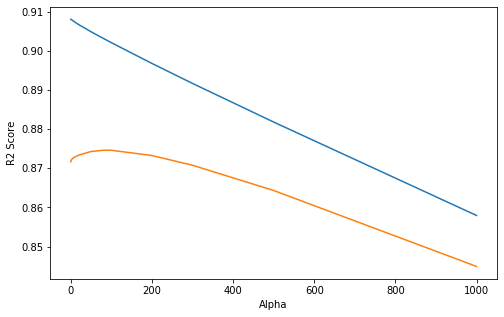

In [168]:
plt.figure(figsize=(8,5))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

**Best hyper-parameter alpha**

In [169]:
ridge_model_cv.best_params_

{'alpha': 80}

**Fitting Ridge Model with best alpha**

In [170]:
alpha = 80
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

**Ridge coefficients**

In [171]:
ridge.coef_

array([-0.02103609,  0.09528062,  0.186867  ,  0.10767847,  0.0667956 ,
        0.04736355,  0.06987812,  0.00721657,  0.04027385,  0.08240564,
        0.04343361,  0.21187123,  0.03947025,  0.05176745,  0.06014778,
        0.04865182,  0.06848134,  0.1114579 , -0.08817484, -0.03926737,
        0.05665392,  0.01432086,  0.02209011,  0.02689501, -0.03588761,
       -0.04111325,  0.04176317,  0.05101222, -0.02640613, -0.0657553 ,
       -0.03491642, -0.05555298, -0.03773865,  0.02474162, -0.0483038 ,
       -0.02781522, -0.02213285, -0.01519261, -0.02507895, -0.02460202,
       -0.00648822,  0.04309719,  0.01947172, -0.03032054,  0.03229417,
       -0.02952127,  0.00056177,  0.0325048 ,  0.01117233,  0.00579213,
        0.06186929,  0.01628413,  0.03173867,  0.04166488, -0.02770581])

**Ridge model predicted sale price**

In [172]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

**Printing the metrics**

In [173]:
metric_ridge = print_results(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge,'Ridge Regression Model')

Ridge Regression Model Training R-Squared: 0.9011596653856091
Ridge Regression Model Testing  R-Squared: 0.9114993477528515 

Ridge Regression Model Training Residual Sum of Squares: 100.91598164129314
Ridge Regression Model Testing  Residual Sum of Squares: 42.377363348625934 

Ridge Regression Model Training Mean Squared Error: 0.09884033461439093
Ridge Regression Model Testing  Mean Squared Error: 0.09675197111558433


### Lasso Regression

**Using 5 Fold Cross Validation and GridSearchCV**

In [174]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, param_grid = params, 
                        scoring= 'r2', cv = folds, 
                        return_train_score=True)            

**Fitting the GridSearch Lasso model**

In [175]:
lasso_model_cv.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 80, 100, 200, 300, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

**Cross Validation results**

In [176]:
cv_result_lasso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040489,0.008051,0.007485,0.006986,0.0001,{'alpha': 0.0001},0.889212,0.765017,0.901024,0.920623,...,0.871827,0.054908,4,0.905750,0.927017,0.901473,0.899587,0.906333,0.908032,0.009827
1,0.009079,0.005259,0.000199,0.000399,0.001,{'alpha': 0.001},0.888426,0.767452,0.900886,0.919592,...,0.873313,0.054079,3,0.905166,0.926405,0.900824,0.899221,0.905326,0.907389,0.009804
2,0.007915,0.007459,0.002059,0.002710,0.005,{'alpha': 0.005},0.890838,0.766593,0.898111,0.918909,...,0.874741,0.054869,1,0.902039,0.923035,0.897013,0.895976,0.901230,0.903858,0.009869
3,0.009363,0.007674,0.003381,0.006762,0.01,{'alpha': 0.01},0.892042,0.767002,0.893495,0.915149,...,0.873589,0.053918,2,0.897034,0.919720,0.892377,0.891370,0.895698,0.899240,0.010449
4,0.003554,0.006608,0.000199,0.000399,0.05,{'alpha': 0.05},0.880118,0.768693,0.865023,0.875898,...,0.854939,0.043623,5,0.865529,0.896339,0.863154,0.864935,0.868137,0.871619,0.012463


**Plotting the alpha value (log scale) against the mean score**

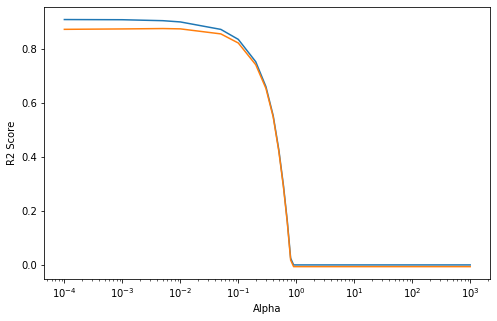

In [177]:
plt.figure(figsize=(8,5))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

**Best hyper-parameter alpha**

In [178]:
lasso_model_cv.best_params_

{'alpha': 0.005}

**Fitting Lasso model with alpha = 0.005**

In [179]:
alpha =0.005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**Lasso Coefficients**

In [180]:
lasso.coef_

array([-0.02161974,  0.09359083,  0.20527589,  0.1215377 ,  0.05781697,
        0.04319395,  0.07632892, -0.        ,  0.03523552,  0.00600546,
       -0.        ,  0.33572643,  0.03449675,  0.01407274,  0.03604768,
        0.04188022,  0.06498855,  0.12245821, -0.1372048 , -0.02545865,
        0.05519936, -0.        , -0.        ,  0.01440081, -0.04182572,
       -0.03953967,  0.04134935,  0.05065576, -0.01726761, -0.05522291,
       -0.02480339, -0.04463575, -0.03124898,  0.02410795, -0.04589675,
       -0.0167005 , -0.01511402, -0.00368177, -0.02380894, -0.01109234,
        0.        ,  0.04633524,  0.01619267, -0.00778254,  0.01123706,
       -0.02276835, -0.        ,  0.02271861,  0.        ,  0.00036814,
        0.0245852 ,  0.00202208,  0.00202041,  0.00959746, -0.01993721])

**Lasso model predicted sale price**

In [181]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

**Printing the metrics**

In [182]:
metric_lasso = print_results(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso,'Lasso Regression Model')

Lasso Regression Model Training R-Squared: 0.9009561444741816
Lasso Regression Model Testing  R-Squared: 0.912423015736422 

Lasso Regression Model Training Residual Sum of Squares: 101.12377649186057
Lasso Regression Model Testing  Residual Sum of Squares: 41.93507718734487 

Lasso Regression Model Training Mean Squared Error: 0.09904385552581838
Lasso Regression Model Testing  Mean Squared Error: 0.09574218535923487


### Printing Results for Linear Regression and Regularization

In [183]:
metric_reg = pd.DataFrame(index=['R-Squared (Train)','R-Squared (Test)',
                                 'RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','Alpha'])
metric_reg['Linear'] = metric_lm+[np.nan]
metric_reg['Ridge'] = metric_ridge+[ridge_model_cv.best_params_['alpha']]
metric_reg['Lasso'] = metric_lasso+[lasso_model_cv.best_params_['alpha']]
metric_reg.round(4)

,Linear,Ridge,Lasso
R-Squared (Train),0.9050,0.9012,0.9010
R-Squared (Test),0.9062,0.9115,0.9124
RSS (Train),97.0282,100.9160,101.1238
RSS (Test),44.9361,42.3774,41.9351
MSE (Train),0.0950,0.0988,0.0990
MSE (Test),0.1026,0.0968,0.0957
Alpha,NaN,80.0000,0.0050


- It is clear that the R-Squared values are similar for Ridge and Lasso.
- The alpha/Lambda for Ridge Regression is 80 
- The alpha/Lambda for Lasso Regression is 0.005 

### Changes in the coefficients after regularization

In [184]:
betas = pd.DataFrame()

In [185]:
betas['Features'] = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [186]:
pd.set_option('display.max_rows', None)
betas=betas.sort_values('Lasso',ascending=False).reset_index(drop=True)
betas

,Features,Linear,Ridge,Lasso
0,GrLivArea,0.413134,0.211871,0.335726
1,OverallQual,0.195937,0.186867,0.205276
2,GarageCars,0.101628,0.111458,0.122458
3,OverallCond,0.120425,0.107678,0.121538
4,LotArea,0.104390,0.095281,0.093591
5,BsmtFinSF1,0.080973,0.069878,0.076329
6,Fireplaces,0.057782,0.068481,0.064989
7,BsmtQual,0.062720,0.066796,0.057817
8,MSSubClass_20,0.066661,0.056654,0.055199
9,MSZoning_RL,0.056243,0.051012,0.050656


**Linear Model Coefficients**

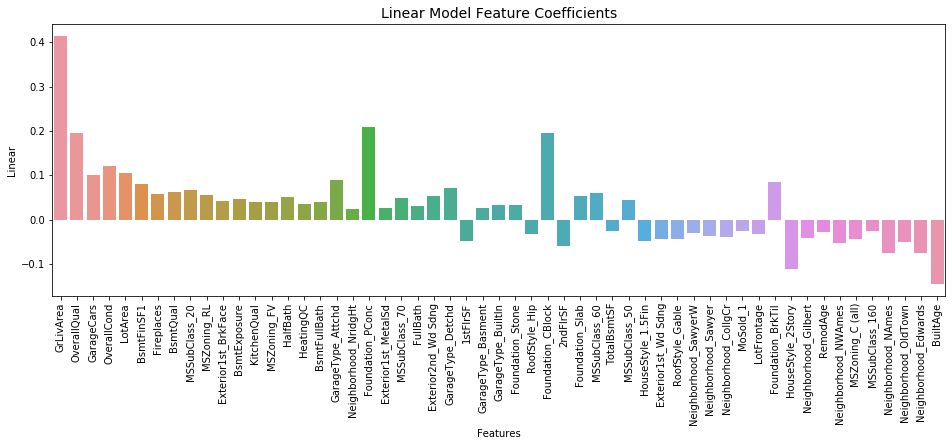

In [187]:
plt.figure(figsize=(16,5))
sns.barplot(x='Features',y='Linear', data = betas)
plt.xticks(rotation=90)
plt.title('Linear Model Feature Coefficients',fontdict={'size':14})
plt.show()

**Ridge Model Coefficients**

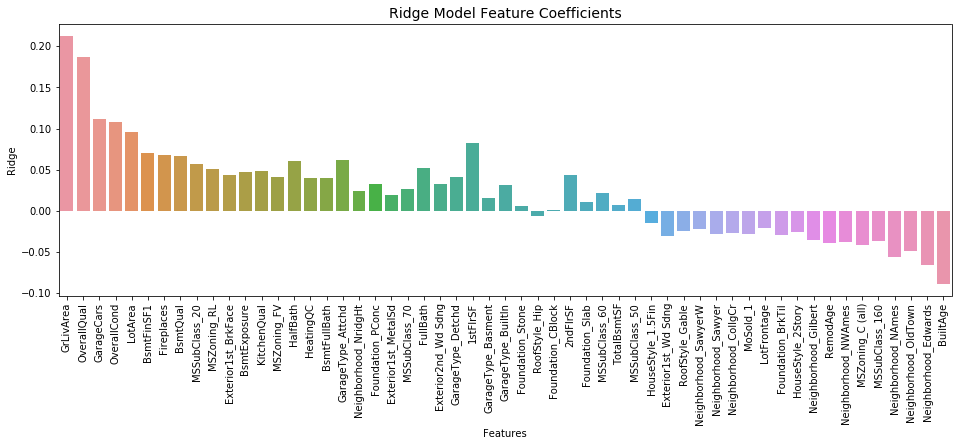

In [188]:
plt.figure(figsize=(16,5))
sns.barplot(x='Features',y='Ridge', data = betas)
plt.xticks(rotation=90)
plt.title('Ridge Model Feature Coefficients',fontdict={'size':14})
plt.show()

**Lasso Model Coefficients**

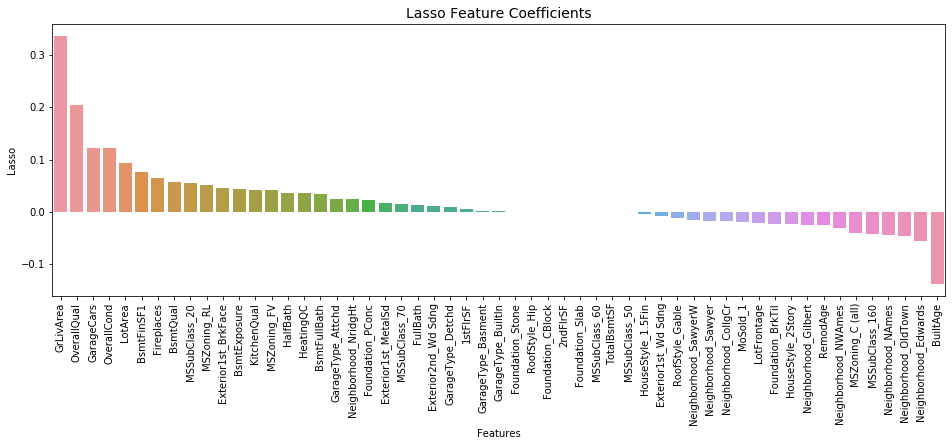

In [189]:
plt.figure(figsize=(16,5))
sns.barplot(x='Features',y='Lasso', data = betas)
plt.xticks(rotation=90)
plt.title('Lasso Feature Coefficients',fontdict={'size':14})
plt.show()

- Lasso model eliminates 7 features by making the slope/coefficient as zero. Since lasso is regularizing and helping in reducing model complexity retaining the accuracy, we shall chose the lasso model as the final model

### Final Model

***Model and Metric results***

In [190]:
alpha =0.005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)
_=print_results(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso,'Lasso Regression Model')

Lasso Regression Model Training R-Squared: 0.9009561444741816
Lasso Regression Model Testing  R-Squared: 0.912423015736422 

Lasso Regression Model Training Residual Sum of Squares: 101.12377649186057
Lasso Regression Model Testing  Residual Sum of Squares: 41.93507718734487 

Lasso Regression Model Training Mean Squared Error: 0.09904385552581838
Lasso Regression Model Testing  Mean Squared Error: 0.09574218535923487


***Model Top 10 Features and coefficients***

In [191]:
attr_weight=pd.DataFrame()
attr_weight['Features']=['']+list(X_train.columns)
attr_weight['Coefficients']=[lasso.intercept_]+list(lasso.coef_)
attr_weight['Absolute']=abs(attr_weight['Coefficients']).round(8)
attr_weight.sort_values('Absolute',ascending=False,inplace=True)
attr_weight = attr_weight[attr_weight.Absolute>0]
attr_weight.reset_index(inplace=True,drop=True)
attr_weight[['Features','Coefficients']].head(10)

,Features,Coefficients
0,GrLivArea,0.335726
1,OverallQual,0.205276
2,BuiltAge,-0.137205
3,GarageCars,0.122458
4,OverallCond,0.121538
5,LotArea,0.093591
6,BsmtFinSF1,0.076329
7,Fireplaces,0.064989
8,BsmtQual,0.057817
9,Neighborhood_Edwards,-0.055223


***Formula for Sale Price as per the Model***

In [192]:
formula = 'SalePrice = '
for i in range(len(attr_weight)):
    if attr_weight.loc[i,'Coefficients']<0 : formula+=' - '
    elif i>0 :  formula+=' + ' 
    if i%3==0 and i>0 : formula+='\n\t    '
    formula+='('+str(attr_weight.loc[i,'Absolute'].round(4))+' x '+attr_weight.loc[i,'Features']+')'
print(formula)

SalePrice = (0.3357 x GrLivArea) + (0.2053 x OverallQual) - (0.1372 x BuiltAge) + 
	    (0.1225 x GarageCars) + (0.1215 x OverallCond) + (0.0936 x LotArea) + 
	    (0.0763 x BsmtFinSF1) + (0.065 x Fireplaces) + (0.0578 x BsmtQual) - 
	    (0.0552 x Neighborhood_Edwards) + (0.0552 x MSSubClass_20) + (0.0507 x MSZoning_RL) + 
	    (0.0463 x Exterior1st_BrkFace) - (0.0459 x Neighborhood_OldTown) - (0.0446 x Neighborhood_NAmes) + 
	    (0.0432 x BsmtExposure) + (0.0419 x KitchenQual) - (0.0418 x MSSubClass_160) + 
	    (0.0413 x MSZoning_FV) - (0.0395 x MSZoning_C (all)) + (0.036 x HalfBath) + 
	    (0.0352 x HeatingQC) + (0.0345 x BsmtFullBath) - (0.0312 x Neighborhood_NWAmes) - 
	    (0.0255 x RemodAge) - (0.0248 x Neighborhood_Gilbert) + (0.0246 x GarageType_Attchd) + 
	    (0.0241 x Neighborhood_NridgHt) - (0.0238 x HouseStyle_2Story) - (0.0228 x Foundation_BrkTil) + 
	    (0.0227 x Foundation_PConc) - (0.0216 x LotFrontage) - (0.0199 x MoSold_1) - 
	    (0.0173 x Neighborhood_CollgCr)

___
# Subjecting Questions and Answers
___

## ***Question 1***  
*What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?*

### **Answer**  
- Optimal value of Alpha for Ridge Regression in 80 and for lasso regression is 0.005  

**Ridge with Original alpha value (alpha = 80)**

In [193]:
ridge = Ridge(alpha=80)
ridge.fit(X_train, y_train) 
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
metric_ridge_80=print_results(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge,'Ridge alpha (80)')

betas_compare=pd.DataFrame()
betas_compare['Features'] = X_train.columns
betas_compare['Ridge_80'] = ridge.coef_

Ridge alpha (80) Training R-Squared: 0.9011596653856091
Ridge alpha (80) Testing  R-Squared: 0.9114993477528515 

Ridge alpha (80) Training Residual Sum of Squares: 100.91598164129314
Ridge alpha (80) Testing  Residual Sum of Squares: 42.377363348625934 

Ridge alpha (80) Training Mean Squared Error: 0.09884033461439093
Ridge alpha (80) Testing  Mean Squared Error: 0.09675197111558433


**Ridge with doubled alpha value (alpha = 160)**

In [194]:
# Ridge with alpha doubled alpha=160
ridge = Ridge(alpha=160)
ridge.fit(X_train, y_train) 
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
metric_ridge_160=print_results(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge,'Ridge alpha (160)')

betas_compare['Ridge_160'] = ridge.coef_

Ridge alpha (160) Training R-Squared: 0.8978025534165079
Ridge alpha (160) Testing  R-Squared: 0.9113001526919583 

Ridge alpha (160) Training Residual Sum of Squares: 104.34359296174544
Ridge alpha (160) Testing  Residual Sum of Squares: 42.47274526116993 

Ridge alpha (160) Training Mean Squared Error: 0.10219744658349211
Ridge alpha (160) Testing  Mean Squared Error: 0.09696973803920077


**Lasso Model with Original alpha value (alpha = 0.005)**

In [195]:
# Lasso with Original Values
lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train) 
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)
metric_lasso_005=print_results(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso,'Lasso alpha (0.005)')

betas_compare['Lasso_0.005'] = lasso.coef_

Lasso alpha (0.005) Training R-Squared: 0.9009561444741816
Lasso alpha (0.005) Testing  R-Squared: 0.912423015736422 

Lasso alpha (0.005) Training Residual Sum of Squares: 101.12377649186057
Lasso alpha (0.005) Testing  Residual Sum of Squares: 41.93507718734487 

Lasso alpha (0.005) Training Mean Squared Error: 0.09904385552581838
Lasso alpha (0.005) Testing  Mean Squared Error: 0.09574218535923487


**Lasso Model with doubled alpha value (alpha = 0.010)**

In [196]:
# Lasso with alpha doubled alpha=0.010
lasso = Lasso(alpha=0.010)
lasso.fit(X_train, y_train) 
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)
metric_lasso_010=print_results(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso,'Lasso alpha (0.010)')

betas_compare['Lasso_0.010'] = lasso.coef_

Lasso alpha (0.010) Training R-Squared: 0.8964222585938567
Lasso alpha (0.010) Testing  R-Squared: 0.9112569013464272 

Lasso alpha (0.010) Training Residual Sum of Squares: 105.75287397567227
Lasso alpha (0.010) Testing  Residual Sum of Squares: 42.4934555942392 

Lasso alpha (0.010) Training Mean Squared Error: 0.10357774140614326
Lasso alpha (0.010) Testing  Mean Squared Error: 0.0970170219046557


**Top 5 Features before and after alpha value change.**

In [197]:
df_features = pd.DataFrame()
def sortfilter(para):
    return betas_compare.iloc[(-betas_compare[para].abs()).argsort()].head(10)['Features'].values

df_features['Ridge (Alpha = 80)'] = sortfilter('Ridge_80')
df_features['Ridge (Alpha = 160)'] = sortfilter('Ridge_160')
df_features['Lasso (Alpha = 0.005)'] = sortfilter('Lasso_0.005')
df_features['Lasso (Alpha = 0.010)'] = sortfilter('Lasso_0.010')

df_features.head()

,Ridge (Alpha = 80),Ridge (Alpha = 160),Lasso (Alpha = 0.005),Lasso (Alpha = 0.010)
0,GrLivArea,GrLivArea,GrLivArea,GrLivArea
1,OverallQual,OverallQual,OverallQual,OverallQual
2,GarageCars,GarageCars,BuiltAge,GarageCars
3,OverallCond,OverallCond,GarageCars,BuiltAge
4,LotArea,1stFlrSF,OverallCond,OverallCond


- For Ridge regression, doubling the value of lambda/alpha keeps the first 4 features the same, however the fifth feature is different.
- For Lasso the first 5 independent features are the same however the priority or the order is shuffled.

**Change in Metric after doubling lambda/alpha**

In [198]:
df_metric = pd.DataFrame(index=['Alpha','R-Squared (Train)','R-Squared (Test)',
                                 'RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'])

df_metric['Ridge (Alpha = 80)'] = [80]+metric_ridge_80
df_metric['Ridge (Alpha = 160)'] = [160]+metric_ridge_160
df_metric['Lasso (Alpha = 0.005)'] = [0.005]+metric_lasso_005
df_metric['Lasso (Alpha = 0.010)'] = [0.010]+metric_lasso_010

df_metric

,Ridge (Alpha = 80),Ridge (Alpha = 160),Lasso (Alpha = 0.005),Lasso (Alpha = 0.010)
Alpha,80.000000,160.000000,0.005000,0.010000
R-Squared (Train),0.901160,0.897803,0.900956,0.896422
R-Squared (Test),0.911499,0.911300,0.912423,0.911257
RSS (Train),100.915982,104.343593,101.123776,105.752874
RSS (Test),42.377363,42.472745,41.935077,42.493456
MSE (Train),0.098840,0.102197,0.099044,0.103578
MSE (Test),0.096752,0.096970,0.095742,0.097017


**For Ridge Regression Model**: 
___
The features are almost the same, only that the order is changed when doubling the alpha value. Also, it is observed that 5 features have coefficients very low in range 0.0005 – 0.008 for double the value of lambda/alpha.

The train and test R-squared value is reduced when the alpha is increased, i.e. the higher alpha value the model becomes under-fit.

___
**For Lasso Regression Model**:  
___
The features are almost the same, except for the last feature out of top 10, also, the order is changed when doubling the alpha value. It is observed that for alpha = 0.005 there are 7 features with coefficients as zero and when the alpha is double, alpha = 0.010, there are 16 features with coefficients as zero.

The train and test R-squared value is reduced when the alpha is increased, i.e., the higher alpha value the model becomes under-fit.


## ***Question 2***  
*You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?*

### **Answer**
```
Optimal value of lambda is chosen, and there are 55 parameters in the final model, and since there are 55 models. The lasso approach would be the best as we get some features eliminated as the lasso approach makes the coefficient zero for the less significant features. The Lasso regression, helps in feature selection by making the coefficients of less significant features as zero. Hence Lasso regression model is chosen as the final model.

In addition, the lasso and ridge regression came up with similar accuracy metric values.
```

## ***Question 3***  
*After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?*

### **Answer**
**Top 5 features from Lasso Model**

In [199]:
top5_features = list(sortfilter('Lasso_0.005'))[:5]
print(top5_features)

['GrLivArea', 'OverallQual', 'BuiltAge', 'GarageCars', 'OverallCond']


**Dropping the Top 5 features from Test and Train set.**

In [200]:
X_train_new = X_train.drop(columns = top5_features)
X_test_new = X_test.drop(columns = top5_features)

**Model Building**

In [201]:
#Parameters to find the new alpha value from Gridsearch CV
params = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 80, 100,200, 300, 500, 1000 ]}

# Gridsearch to find the optimal alpha values
lasso_model_cv_new = GridSearchCV(Lasso(), params, 'r2',cv = 5)

# Firring the Gridsearch Model
lasso_model_cv_new.fit(X_train_new, y_train) 

# Best Optimal alpha
alpha = lasso_model_cv_new.best_params_['alpha']
print('Alpha value optimal = ',alpha,'\n')

# Fitting the lasso model with optimal alpha
lasso_new = Lasso(alpha=alpha)
lasso_new.fit(X_train_new, y_train) 

# Prediction of sale proce with new lasso model
y_pred_train_lasso_new = lasso_new.predict(X_train_new)
y_pred_test_lasso_new = lasso_new.predict(X_test_new)

Alpha value optimal =  0.005 



**Printing the accuracy**

In [202]:
metric_lasso_new = print_results(y_train, y_pred_train_lasso_new, 
                             y_test, y_pred_test_lasso_new,'New Lasso Regression Model')

# Metric DataFrame 
metric_reg = pd.DataFrame(index=['R-Squared (Train)','R-Squared (Test)',
                                 'RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','Alpha'])
metric_reg['Lasso_New'] = metric_lasso_new+[lasso_model_cv_new.best_params_['alpha']]

# Coefficient DataFrame
betas_lasso_new = pd.DataFrame(index= X_train_new.columns)
betas_lasso_new['Lasso_New'] = lasso_new.coef_
betas_lasso_new['Abs_Lasso_New'] = abs(lasso_new.coef_)

New Lasso Regression Model Training R-Squared: 0.8628878010853971
New Lasso Regression Model Testing  R-Squared: 0.8825854140297794 

New Lasso Regression Model Training Residual Sum of Squares: 139.99155509180954
New Lasso Regression Model Testing  Residual Sum of Squares: 56.222416962456165 

New Lasso Regression Model Training Mean Squared Error: 0.13711219891460288
New Lasso Regression Model Testing  Mean Squared Error: 0.12836168256268532


**New Metrics data**

In [203]:
display(metric_reg.round(4))

,Lasso_New
R-Squared (Train),0.8629
R-Squared (Test),0.8826
RSS (Train),139.9916
RSS (Test),56.2224
MSE (Train),0.1371
MSE (Test),0.1284
Alpha,0.0050


**Top 10 Lasso coefficients**

In [204]:
betas_lasso_new.sort_values('Abs_Lasso_New',ascending=False).head(10)[['Lasso_New']]

,Lasso_New
1stFlrSF,0.296579
2ndFlrSF,0.211047
GarageType_Attchd,0.164347
GarageType_Detchd,0.136766
BsmtQual,0.131079
KitchenQual,0.116136
FullBath,0.104894
LotArea,0.103058
RemodAge,-0.102126
Neighborhood_Edwards,-0.100168


Five most important predictor variables from the lasso model initially were, 
1.	GrLivArea
2.	OverallQual
3.	BuiltAge
4.	GarageCars
5.	OverallCond

Since these predictor variables are no more available in the incoming data, we need to re-model the data using the new set of data, so a Grid Search is used with new Training data to obtain the optimum alpha value for the new set of incoming data, it was found that the alpha value remains same, even after dropping the important variables. Optimum alpha is observed to be = 0.005

- It is also observed that the R-squared value has reduced to 86% for training set and 88% for testing set.

The first 5 important variables with the new set of incoming data are
1.	1stFlrSF 
2.	2ndFlrSF
3.	Garage Type Attached 
4.	Garage Type Detached
5.	Basement Quality


## ***Question 4***  
*How can you make sure that a model is robust and generalizable? What are the implications of the same for the accuracy of the model and why?*

### Answer  
The model will be robust when the Bias (Bias2) and Variance is low. When the model is too simple, the Bias will be too high and variance will be too low. This is a case of under fitted model. As the model complexity increases, the bias keeps reducing steadily and the variance keep increasing steadily. When model becomes too complex, the bias (Bias2) will be lowest but the variance will be too high. This is an over-fitted model scenario.

The regularization technique is one of the methods that helps the model to be in the robust and generalized condition, but helping the model to be not over fitted by applying penalty by using a hyper-parameter using lambda/alpha.

Refer the graphical representation as below,


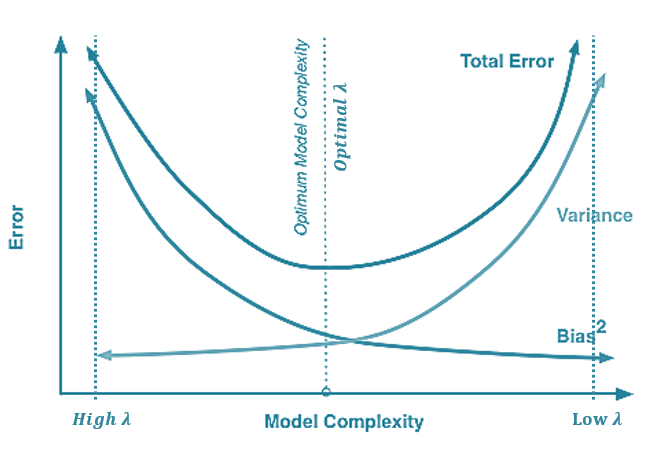

The model is robust and generalized when there is a Bias2 – variance trade off, then the bias and variance are low. This happens for optimal model complexity and optimal lambda value. 

When the complexity of model is more, it means the Bias is low and variance is high, the value of lambda goes to 0. There is no penalization for the model. This means the model is over fitted. The model has learned the pattern completely and it works very well for the training data. This model will give very high accuracy scores for the training data since the model has learned all the data points in the training data, However, when the testing data is applied, the test accuracy will be low since the data is new and the pattern is now learned by the model.

When the complexity of the model is low. It means the Bias is high and the variance is low. This means the model is not able to learn the pattern from that data, in this case both the train accuracy and the test accuracy will be low. When the lambda values in regularization is high, the higher lambda would eliminate the effect of many features thereby making the model not learn the pattern within the data. This is the case of under-fitting.

From under fitting to over fitting, the accuracy of the training set increases steadily, model learns patterns and then slowly learns all the data points when the model is over fitted. When the model is optimal, the training and testing accuracy will be optimal, and value will be in similar range. The lambda will penalize the insignificant features. The model will not be under fitted or over fitted. The bias and variance will be at the lower in total (Total error = Bias2+Variance). Model is generalized and robust when the model complexity and lambda/alpha value is optimal.

________
